### Import libraries

In [1]:
import xarray as xr
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from typing import Tuple
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

/Users/luigiaripani/Documents/Projets/Hackathon/visualisation-de-la-donnee/venv_mf/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


### Import and concatenate data

In [2]:
drias_85 = xr.open_dataset("/Users/luigiaripani/Downloads/raw_data_explore2_tasAdjust_CNRM-CERFACS-CNRM-CM5_CNRM-ALADIN63_rcp85.nc") 
drias_hist = xr.open_dataset("/Users/luigiaripani/Downloads/raw_data_explore2_tasAdjust_CNRM-CERFACS-CNRM-CM5_CNRM-ALADIN63_historical.nc") 

/Users/luigiaripani/Documents/Projets/Hackathon/visualisation-de-la-donnee/venv_mf/lib/python3.9/site-packages/xarray/backends/plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
drias = xr.concat([drias_hist, drias_85], dim="time")

### Create dataframe for Montpellier

In [5]:
montpellier_lat_min = 43.53745566266778
montpellier_lat_max = 43.620158924076194
montpellier_lon_min = 3.820192270186379
montpellier_lon_max = 3.952590170040793

In [10]:
drias_montpellier_85 = drias_85.where((drias_85.lat <= montpellier_lat_max) & (drias_85.lat>= montpellier_lat_min) & (drias_85.lon<=montpellier_lon_max) & (drias_85.lon>=montpellier_lon_min))  
drias_montpellier_hist = drias_hist.where((drias_hist.lat <= montpellier_lat_max) & (drias_hist.lat>=montpellier_lat_min) & (drias_hist.lon<=montpellier_lon_max) & (drias_hist.lon>=montpellier_lon_min))  

In [15]:
drias_montpellier = xr.concat([drias_montpellier_hist, drias_montpellier_85], dim='time')

In [18]:
drias_montpellier.to_netcdf("drias_tasadjust_montpellier.nc")

#### Clean and save as datadrame

In [7]:
drias_85_montpellier = drias_85_montpellier.to_dataframe().dropna()

In [8]:
drias_montpellier_df_hist = drias_montpellier_hist.to_dataframe().dropna()

In [19]:
drias_montpellier_df_hist_clean = drias_montpellier_df_hist.reset_index()
drias_85_montpellier_clean = drias_85_montpellier.reset_index()

In [20]:
drias_montpellier_df_hist_clean.drop(columns={"y", "x", "lat", "lon", "LambertParisII"}, inplace=True)
drias_85_montpellier_clean.drop(columns={"y", "x", "lat", "lon", "LambertParisII"}, inplace=True)

In [21]:
drias_montpellier_df_hist_clean.rename(columns= {"time" : "DATE", "tasAdjust" : "T_Q"}, inplace=True)
drias_85_montpellier_clean.rename(columns= {"time" : "DATE", "tasAdjust" : "T_Q"}, inplace=True)

In [22]:
drias_montpellier_df_hist_clean["time"] = pd.to_datetime(drias_montpellier_df_hist_clean['DATE'], format="%d/%m/%Y")
drias_85_montpellier_clean["time"] = pd.to_datetime(drias_85_montpellier_clean['DATE'], format="%d/%m/%Y")

In [37]:
drias_montpellier_df = pd.concat([drias_montpellier_df_hist_clean, drias_85_montpellier_clean], axis=0)

In [39]:
drias_montpellier_df = drias_montpellier_df.drop(columns="time")

In [40]:
drias_montpellier_df.head(4)

,DATE,T_Q
0,1951-01-01,277.255310
1,1951-01-02,274.479645
2,1951-01-03,275.619751
3,1951-01-04,274.958771


In [45]:
drias_montpellier_df.to_csv("drias_montpellier_tasadjust_df.csv", index=False)

In [46]:
pd.read_csv("drias_montpellier_tasadjust_df.csv")

,DATE,T_Q
0,1951-01-01,277.25530
1,1951-01-02,274.47964
2,1951-01-03,275.61975
3,1951-01-04,274.95877
4,1951-01-05,274.45822
...,...,...
54782,2100-12-27,281.77173
54783,2100-12-28,280.70395
54784,2100-12-29,280.77286
54785,2100-12-30,280.33194


 ### Create a test indicator for Montpellier

## Plot

In [49]:
df_drias_mp = pd.read_csv("drias_montpellier_tasadjust_df.csv")

In [50]:
df_drias_mp.head(3)

,DATE,T_Q
0,1951-01-01,277.25530
1,1951-01-02,274.47964
2,1951-01-03,275.61975


In [135]:
df_drias_mp["T_Q"] = df_drias_mp["T_Q"] -273.15

In [51]:
df_drias_mp["DATE"]= pd.to_datetime(df_drias_mp["DATE"])

In [52]:
df_drias_mp["MOIS"] = df_drias_mp["DATE"].dt.month
df_drias_mp["ANNEE"] = df_drias_mp["DATE"].dt.year
df_drias_mp["JOUR"] = df_drias_mp["DATE"].dt.day

#### Compute monthly max as an indicator

In [53]:
#monthly max
df_drias_ind = df_drias_mp.groupby(["MOIS", "ANNEE"])["T_Q"].max().reset_index()

In [54]:
df_drias_ind.rename(columns={"T_Q" : "T_MAX"}, inplace=True)

In [55]:
df_drias_ind.head(3)

,MOIS,ANNEE,T_MAX
0,1,1951,286.31006
1,1,1952,285.94710
2,1,1953,283.91568


In [56]:
month_choice = 8
start_year_ref = 1951 #start ref period to compute anomalies
start_year_plot = 1951 #start year to display in the plot
end_year_plot = 2100 #end year to display in the plot

In [142]:
df_drias_ind = df_drias_ind[df_drias_ind.MOIS==month_choice]

In [143]:
ref_ind = df_drias_ind[(df_drias_ind.ANNEE <= start_year_ref+30) & (df_drias_ind.ANNEE >= start_year_ref)].T_MAX.mean()
ref_ind

27.849373897429455

In [144]:
df_drias_ind["ANOM_T_MAX"] = df_drias_ind.T_MAX - ref_ind

In [145]:
df_drias_ind.head(3)

,MOIS,ANNEE,T_MAX,ANOM_T_MAX
1050,8,1951,28.420831,0.571457
1051,8,1952,29.690210,1.840836
1052,8,1953,25.957880,-1.891494


In [16]:
import matplotlib.pyplot as plt
import plotly.express as px

In [17]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [99]:
#df_drias_ind_to_plot = df_drias_ind[(df_drias_ind.ANNEE<=end_year_plot) & (df_drias_ind.ANNEE>= start_year_plot) & (df_drias_ind.MOIS==month_choice)]

In [98]:
#df_drias_ind_to_plot.to_csv("test_ind_plot.csv", index=False)

In [25]:
#plt.bar(df_drias_ind_to_plot.ANNEE, df_drias_ind_to_plot.ANOM_T_MAX)

In [85]:
#fig = px.bar(df_drias_ind_to_plot, x='ANNEE', y='ANOM_T_MAX', color='T_MAX', color_continuous_scale="RdYlBu_r")
#fig.update_traces(hovertemplate='Année: %{x}<br>Anomalie: %{y:.1f}°')
#fig.show()

In [146]:
df_drias_ind["rolling_avg"] = df_drias_ind.ANOM_T_MAX.rolling(window=30).mean()
df_drias_ind["rolling_std"] = df_drias_ind.ANOM_T_MAX.rolling(window=30).std()

In [147]:
df_drias_ind

,MOIS,ANNEE,T_MAX,ANOM_T_MAX,rolling_avg,rolling_std
1050,8,1951,28.420831,0.571457,NaN,NaN
1051,8,1952,29.690210,1.840836,NaN,NaN
1052,8,1953,25.957880,-1.891494,NaN,NaN
1053,8,1954,28.919519,1.070145,NaN,NaN
1054,8,1955,25.344171,-2.505203,NaN,NaN
...,...,...,...,...,...,...
1195,8,2096,33.057670,5.208296,5.168945,2.384232
1196,8,2097,37.571400,9.722026,5.408111,2.470463
1197,8,2098,36.267540,8.418166,5.604099,2.468184
1198,8,2099,38.089780,10.240406,5.813655,2.587238


In [102]:
df_drias_ind.to_csv("df_drias_ind_test.csv")

In [63]:
#df_drias_ind_sel_plot = df_drias_ind_sel[(df_drias_ind_sel.ANNEE<=end_year_plot) & (df_drias_ind_sel.ANNEE>=start_year_plot)]

In [104]:
#fig = px.line(df_drias_ind, x='ANNEE', y=['rolling_avg'], 
#              labels={'value1': 'Value 1'},
#              title='Line Plot of Value 1 and Value 2')
# Show plot
#fig.show()

In [105]:
indicateur = "Temperature maximale"
periode_start = "01/08"
periode_end = "31/01"

In [151]:
df_drias_ind["avg + std"] = df_drias_ind["rolling_avg"] + df_drias_ind["rolling_std"]
df_drias_ind["avg - std"] = df_drias_ind["rolling_avg"] - df_drias_ind["rolling_std"]

In [148]:
threshold = 2024
df_drias_ind.loc[df_drias_ind['ANNEE'] > threshold, 'ANOM_T_MAX'] = np.nan

In [149]:
df_drias_ind.to_csv("test_plot.csv", index=False)

In [116]:

df = df_drias_ind

# Create line plot for value1
fig = px.line(df, x='ANNEE', y='rolling_avg', labels={'rolling_avg': 'Écart à la moyenne (°C)', "ANNEE" : "Année"}, color_discrete_sequence=['green'], 
              title=f'{indicateur} entre le {periode_start} et le {periode_end}.<br>Écart à la moyenne de référence {start_year_ref}-{start_year_ref+30}')

# Add bar plot for value2
fig.add_bar(x=df['ANNEE'], y=df['ANOM_T_MAX'], name=' T MAX(°C)', marker=dict(color=df_drias_ind['T_MAX'], coloraxis="coloraxis"))
fig.update_layout(coloraxis=dict(colorscale='RdYlBu_r'))
fig.update_traces(hovertemplate='Année: %{x}<br>Anomalie: %{y:.1f}°')

# Show plot
fig.show()


In [128]:
dict_indicateurs = {"T_MAX" : "Temperature maximale"}

def plot_climate_strips(df, indicateur, periode_start, periode_end, start_year_plot, end_year_plot):
    fig = px.line(df, x='ANNEE', y='rolling_avg', labels={'rolling_avg': 'Écart à la moyenne (°C)', "ANNEE" : "Année"}, color_discrete_sequence=['green'], 
              title=f'{dict_indicateurs[indicateur]} entre le {periode_start} et le {periode_end}.<br>Écart à la moyenne de référence {start_year_ref}-{start_year_ref+30}')

    fig.add_bar(x=df['ANNEE'], y=df['ANOM_'+indicateur], name=f'{indicateur} (°C)', marker=dict(color=df_drias_ind[indicateur], coloraxis="coloraxis"))
    fig.update_layout(coloraxis=dict(colorscale='RdYlBu_r'))
    fig.update_traces(hovertemplate='Année: %{x}<br>Anomalie: %{y:.1f}°')

    fig.show()

In [127]:
plot_climate_strips(df_drias_ind, "T_MAX", "01/08", "31/08", 1951, 1981)

In [155]:
dict_indicateurs = {"T_MAX" : "Temperature maximale"}

def plot_climate_strips(df, indicateur, periode_start, periode_end, start_year_plot, end_year_plot):
    fig = px.line(df, x='ANNEE', y='rolling_avg', labels={'rolling_avg': 'Écart à la moyenne (°C)', "ANNEE" : "Année"}, color_discrete_sequence=['green'], 
              title=f'{dict_indicateurs[indicateur]} entre le {periode_start} et le {periode_end}.<br>Écart à la moyenne de référence {start_year_ref}-{start_year_ref+30}')
    
    fig.add_scatter(x=df['ANNEE'], y=df['avg + std'], mode='lines', line=dict(width=0), fill='tonexty')
    fig.add_scatter(x=df['ANNEE'], y=df['avg - std'], mode='lines', line=dict(width=0), fill='tonexty')

    fig.add_bar(x=df['ANNEE'], y=df['ANOM_'+indicateur], name=f'{indicateur} (°C)', marker=dict(color=df_drias_ind[indicateur], coloraxis="coloraxis"))
    fig.update_layout(coloraxis=dict(colorscale='RdYlBu_r'))
    fig.update_traces(hovertemplate='Année: %{x}<br>Anomalie: %{y:.1f}°')

    fig.show()

In [156]:
plot_climate_strips(df_drias_ind, "T_MAX", "01/08", "31/08", 1951, 1981)

In [162]:
def map_commune(commune, latitude, longitude):

    data = {'Latitude': latitude, 'Longitude': longitude}

    # Plot the point on the map
    fig = px.scatter_mapbox(data, lat='Latitude', lon='Longitude', zoom=10)

    # Customize map layout
    fig.update_layout(mapbox_style='open-street-map', mapbox_zoom=10, 
                      mapbox_center={'lat': latitude[0], 'lon': longitude[0]}, title = commune)
    fig.update_traces(marker=dict(symbol='star', size=10))

    # Show the plot
    fig.show()

In [163]:
map_commune("Montpellier", [43.61361315241169], [3.875541887925083])

In [ ]:
df_drias_ind["rollind_drias"] = df_drias_ind

### Création indicateurs sur la France 

In [57]:
drias

<xarray.Dataset>
Dimensions:         (x: 143, y: 134, time: 54787)
Coordinates:
  * x               (x) float64 6e+04 6.8e+04 7.6e+04 ... 1.188e+06 1.196e+06
  * y               (y) float64 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * time            (time) datetime64[ns] 1951-01-01 1951-01-02 ... 2100-12-31
    lat             (y, x) float64 41.36 41.37 41.37 41.38 ... 50.85 50.84 50.83
    lon             (y, x) float64 -4.097 -4.002 -3.907 ... 10.57 10.68 10.79
Data variables:
    LambertParisII  (time) float64 -2.147e+09 -2.147e+09 ... -2.147e+09
    tasAdjust       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/38)
    description:                    Created by xios
    title:                          Created by xios
    Conventions:                    CF-1.6
    creation_date:                  2018-10-19T08:42:38Z
    name:                           EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r...
    institute_id:                   CNRM
    ...                             ...
    bc_domain:                      FR-France
    bc_period_ref:                  1980-2011
    bc_period_rcm:                  1974-2005
    bc_info:                        Meteo-France-ADAMONT-France_SAFRAN-France...
    product:                        bias-correction
    bc_comment:                     Weather Regime dependant BC methode

#### Functions

In [59]:
def count_heat_days_1y(ds, threshold, month_start, month_end, day_start, day_end):
    start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)  
    end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)

    ds_copy = ds.copy() 
    ds_copy = ds_copy.sel(time=slice(start_date, end_date))
    
    return ds_copy.where(ds_copy.tasAdjust>=threshold).count(dim="time")

def count_heat_days(ds, threshold, month_start, month_end, day_start, day_end):
    mask = ~ds.isel(time=0).tasAdjust.isnull()
    ds_resempled = ds.resample(time='1Y').apply(count_heat_days_1y, threshold=threshold,month_start= month_start, month_end= month_end, day_start= day_start, day_end=day_end)
    ds_resempled = ds_resempled.where(mask.data)
    return ds_resempled

def count_heat_days_france_horizon(ds, threshold, horizon, month_start, month_end, day_start, day_end):
    ds_copy = ds.copy()
    ds_copy["tasAdjust"] = ds_copy["tasAdjust"] - 273.15
    ds_ind = count_heat_days(ds_copy, threshold = threshold ,month_start= month_start, month_end= month_end, day_start= day_start, day_end=day_end)
    ds_hor = ds_ind.sel(time=slice(str(horizon-15), str(horizon+15))).mean(dim="time")
    return ds_hor.tasAdjust.mean()

In [65]:
def count_heat_days_france_yearly(ds, threshold, month_start, month_end, day_start, day_end):
    ds_copy = ds.copy()
    ds_copy["tasAdjust"] = ds_copy["tasAdjust"] - 273.15
    ds_ind = count_heat_days(ds_copy, threshold = threshold ,month_start= month_start, month_end= month_end, day_start= day_start, day_end=day_end)
    return ds_ind

In [60]:
### demo parameters 
mois_debut = 7
mois_fin = 9
jour_debut = 1 
jour_fin = 9
temp_seuil = 25

In [61]:
demo_results_2050 = count_heat_days_france_horizon(drias, temp_seuil, 2050, mois_debut, mois_fin, jour_debut, jour_fin)
demo_results_2024 = count_heat_days_france_horizon(drias, temp_seuil, 2024, mois_debut, mois_fin, jour_debut, jour_fin)
demo_results_1995 = count_heat_days_france_horizon(drias, temp_seuil, 1995, mois_debut, mois_fin, jour_debut, jour_fin)

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

In [66]:
ds_heatdays_fr_demo = count_heat_days_france_yearly(drias, temp_seuil, mois_debut, mois_fin, jour_debut, jour_fin)

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22767/406203883.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0]

In [68]:
ds_heatdays_fr_demo.to_netcdf("ds_heatdays_fr_demo.nc")

In [70]:
demo_results_2050

<xarray.DataArray 'tasAdjust' ()>
array(10.19375709)

In [273]:
ds_ind.sel(time=slice(str(2050-15), str(2050+15))).mean(dim="time").tasAdjust.mean()

<xarray.DataArray 'tasAdjust' ()>
array(2.71661319)

In [ ]:
subset = ds.sel(time=(ds['time.month'] >= 1) & (ds['time.month'] <= 3))

In [382]:
drias_85_1y['time.year'][0].data

array(2050)

In [9]:
def select_period_1y(ds, month_start, month_end, day_start, day_end):
    start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)  
    end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)

    return ds.sel(time=slice(start_date, end_date))

In [386]:
select_period_1y(drias_85_1y, 3, 4, 25, 28)

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_19144/3704781466.py:2: DeprecationWarning:

an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_19144/3704781466.py:3: DeprecationWarning:

an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.



<xarray.Dataset>
Dimensions:         (x: 143, y: 134, time: 35)
Coordinates:
  * x               (x) float64 6e+04 6.8e+04 7.6e+04 ... 1.188e+06 1.196e+06
  * y               (y) float64 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * time            (time) datetime64[ns] 2050-03-25 2050-03-26 ... 2050-04-28
    lat             (y, x) float64 41.36 41.37 41.37 41.38 ... 50.85 50.84 50.83
    lon             (y, x) float64 -4.097 -4.002 -3.907 ... 10.57 10.68 10.79
Data variables:
    LambertParisII  (time) float64 -2.147e+09 -2.147e+09 ... -2.147e+09
    tasAdjust       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/38)
    description:                    Created by xios
    title:                          Created by xios
    Conventions:                    CF-1.6
    creation_date:                  2018-10-19T08:42:38Z
    name:                           EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r...
    institute_id:                   CNRM
    ...                             ...
    bc_domain:                      FR-France
    bc_period_ref:                  1980-2011
    bc_period_rcm:                  1974-2005
    bc_info:                        Meteo-France-ADAMONT-France_SAFRAN-France...
    product:                        bias-correction
    bc_comment:                     Weather Regime dependant BC methode

In [389]:
def select_period(ds, month_start, month_end, day_start, day_end):
    return ds.resample(time="1Y").apply(select_period_1y, month_start=month_start, month_end=month_end, day_start=day_start, day_end=day_end)


In [394]:
test = select_period(drias_85, 3, 4, 25, 28)

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_19144/3704781466.py:2: DeprecationWarning:

an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_19144/3704781466.py:3: DeprecationWarning:

an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.



In [395]:
test

<xarray.Dataset>
Dimensions:         (x: 143, y: 134, time: 3325)
Coordinates:
  * x               (x) float64 6e+04 6.8e+04 7.6e+04 ... 1.188e+06 1.196e+06
  * y               (y) float64 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
    lat             (y, x) float64 41.36 41.37 41.37 41.38 ... 50.85 50.84 50.83
    lon             (y, x) float64 -4.097 -4.002 -3.907 ... 10.57 10.68 10.79
Dimensions without coordinates: time
Data variables:
    LambertParisII  (time) float64 -2.147e+09 -2.147e+09 ... -2.147e+09
    tasAdjust       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/38)
    description:                    Created by xios
    title:                          Created by xios
    Conventions:                    CF-1.6
    creation_date:                  2018-11-19T14:35:23Z
    name:                           EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1...
    institute_id:                   CNRM
    ...                             ...
    bc_domain:                      FR-France
    bc_period_ref:                  1980-2011
    bc_period_rcm:                  1974-2005
    bc_info:                        Meteo-France-ADAMONT-France_SAFRAN-France...
    product:                        bias-correction
    bc_comment:                     Weather Regime dependant BC methode

In [367]:
drias_85_1y = drias.sel(time="2050")

In [ ]:
sel months = drias.sel(time=slice(str()))

In [32]:
test_1 = count_heat_days_1y(drias_montepellier.sel(time="2020"), 25, 7, 9, 1, 30)

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)


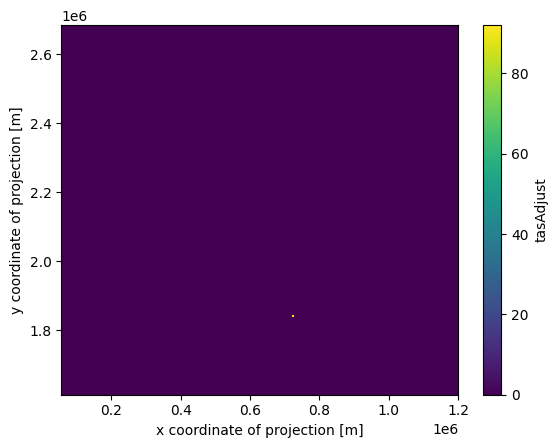

In [35]:
test_1.tasAdjust.plot()

In [41]:
drias_montepellier.sel(time="2020").where(drias_montepellier.tasAdjust>=273.15+25).count(dim="time").tasAdjust.max()

<xarray.DataArray 'tasAdjust' ()>
array(50)

In [23]:
count_heat_days_france_horizon(drias_montepellier, 25, 2020, 7, 9, 1, 30)

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/1133031145.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

<xarray.DataArray 'tasAdjust' ()>
array(33.48387097)

In [25]:
drias_montepellier.sel(time=slice("2005", "2035"))

<xarray.Dataset>
Dimensions:         (time: 11322, y: 134, x: 143)
Coordinates:
  * x               (x) float64 6e+04 6.8e+04 7.6e+04 ... 1.188e+06 1.196e+06
  * y               (y) float64 1.617e+06 1.625e+06 ... 2.673e+06 2.681e+06
  * time            (time) datetime64[ns] 2005-01-01 2005-01-02 ... 2035-12-31
    lat             (y, x) float64 41.36 41.37 41.37 41.38 ... 50.85 50.84 50.83
    lon             (y, x) float64 -4.097 -4.002 -3.907 ... 10.57 10.68 10.79
Data variables:
    LambertParisII  (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    tasAdjust       (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/38)
    description:                    Created by xios
    title:                          Created by xios
    Conventions:                    CF-1.6
    creation_date:                  2018-10-19T08:42:38Z
    name:                           EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r...
    institute_id:                   CNRM
    ...                             ...
    bc_domain:                      FR-France
    bc_period_ref:                  1980-2011
    bc_period_rcm:                  1974-2005
    bc_info:                        Meteo-France-ADAMONT-France_SAFRAN-France...
    product:                        bias-correction
    bc_comment:                     Weather Regime dependant BC methode

In [14]:
def count_cold_days_1y(ds, threshold, month_start, month_end, day_start, day_end):
    start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)  
    end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)

    ds_copy = ds.copy() 
    ds_copy = ds_copy.sel(time=slice(start_date, end_date))
    
    return ds_copy.where(ds_copy.tasAdjust<=threshold).count(dim="time")

def count_cold_days(ds, threshold, month_start, month_end, day_start, day_end):
    mask = ~ds.isel(time=0).tasAdjust.isnull()
    ds_resempled = ds.resample(time='1Y').apply(count_cold_days_1y, threshold=threshold,month_start= month_start, month_end= month_end, day_start= day_start, day_end=day_end)
    ds_resempled = ds_resempled.where(mask.data)
    return ds_resempled

def count_cold_days_france_horizon(ds, threshold, horizon, month_start, month_end, day_start, day_end):
    ds_copy = ds.copy()
    ds_copy["tasAdjust"] = ds_copy["tasAdjust"] - 273.15
    ds_ind = count_cold_days(ds_copy, threshold = threshold ,month_start= month_start, month_end= month_end, day_start= day_start, day_end=day_end)
    ds_hor = ds_ind.sel(time=slice(str(horizon-15), str(horizon+15))).mean(dim="time")
    return ds_hor.tasAdjust.mean()

test = count_cold_days_france_horizon(drias_85, 0, 2050, 1, 3, 1, 30)

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year'][0] , month=month_start, day=day_start)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:3: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  end_date = pd.Timestamp(year = ds['time.year'][0], month=month_end, day=day_end)
/var/folders/bn/0cgc7btx7457kgnszp5ln7ch0000gn/T/ipykernel_22607/2878008556.py:2: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  start_date = pd.Timestamp(year = ds['time.year']

In [17]:
%%time
test = count_heat_days_france_horizon(drias_85, 25, 2050, 7, 9, 1, 30)

NameError: name 'count_heat_days_france_horizon' is not defined